<a href="https://colab.research.google.com/github/jmdelvecchio/ears33/blob/main/Dam_removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cross Sections of Rivers and Dam Removals

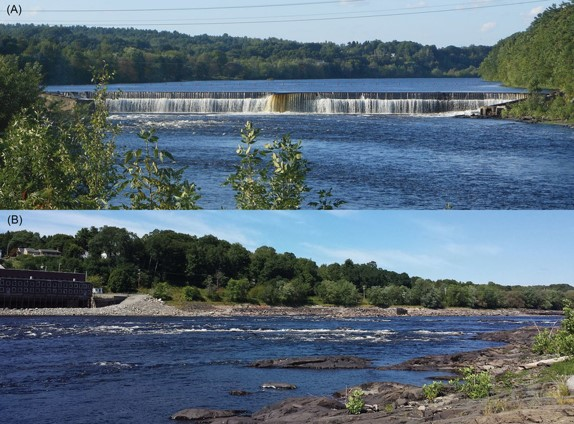

The ability to see the effects of a dam removal is crucial for propper planning, both as a measure of ecosystem stability and human saftey. One way to analyze dams removed in the past is to quantify the changes in channel geography. In this data tutorial we will be graphically representing the evolution of select sites used in "River Channel response to dam removals on the lower Penobscot River, Maine, United States" (2020). From the data collected from the authors, we will recreate the plots used to represent changes in bed geography from 3 sites (1: Control, 4: Directly above Great Works Dam, 11: Directly above Veazie Dam). The control was selected to show normal year-to-year changes in a streambed and sites 4 and 11 were selected since they experianced some of the highest rates of change across the study. 

Link to reference paper: [Colliins et al 2020](https://onlinelibrary.wiley.com/doi/full/10.1002/rra.3700?utm_campaign=RESR_MRKT_Researcher_inbound&af=R&utm_medium=referral&utm_source=researcher_app)

This content relates to our study of channel geometry in a few ways. Firstly, the forces that dictate sediment transfer and velocity as a function of depth are what create the common problem of compounded sediment behind many dams across the world. While this study looks at unique cases where this does not occur, looking at the geology of our streambeds explains the differences we see in this channels geomorphology: 

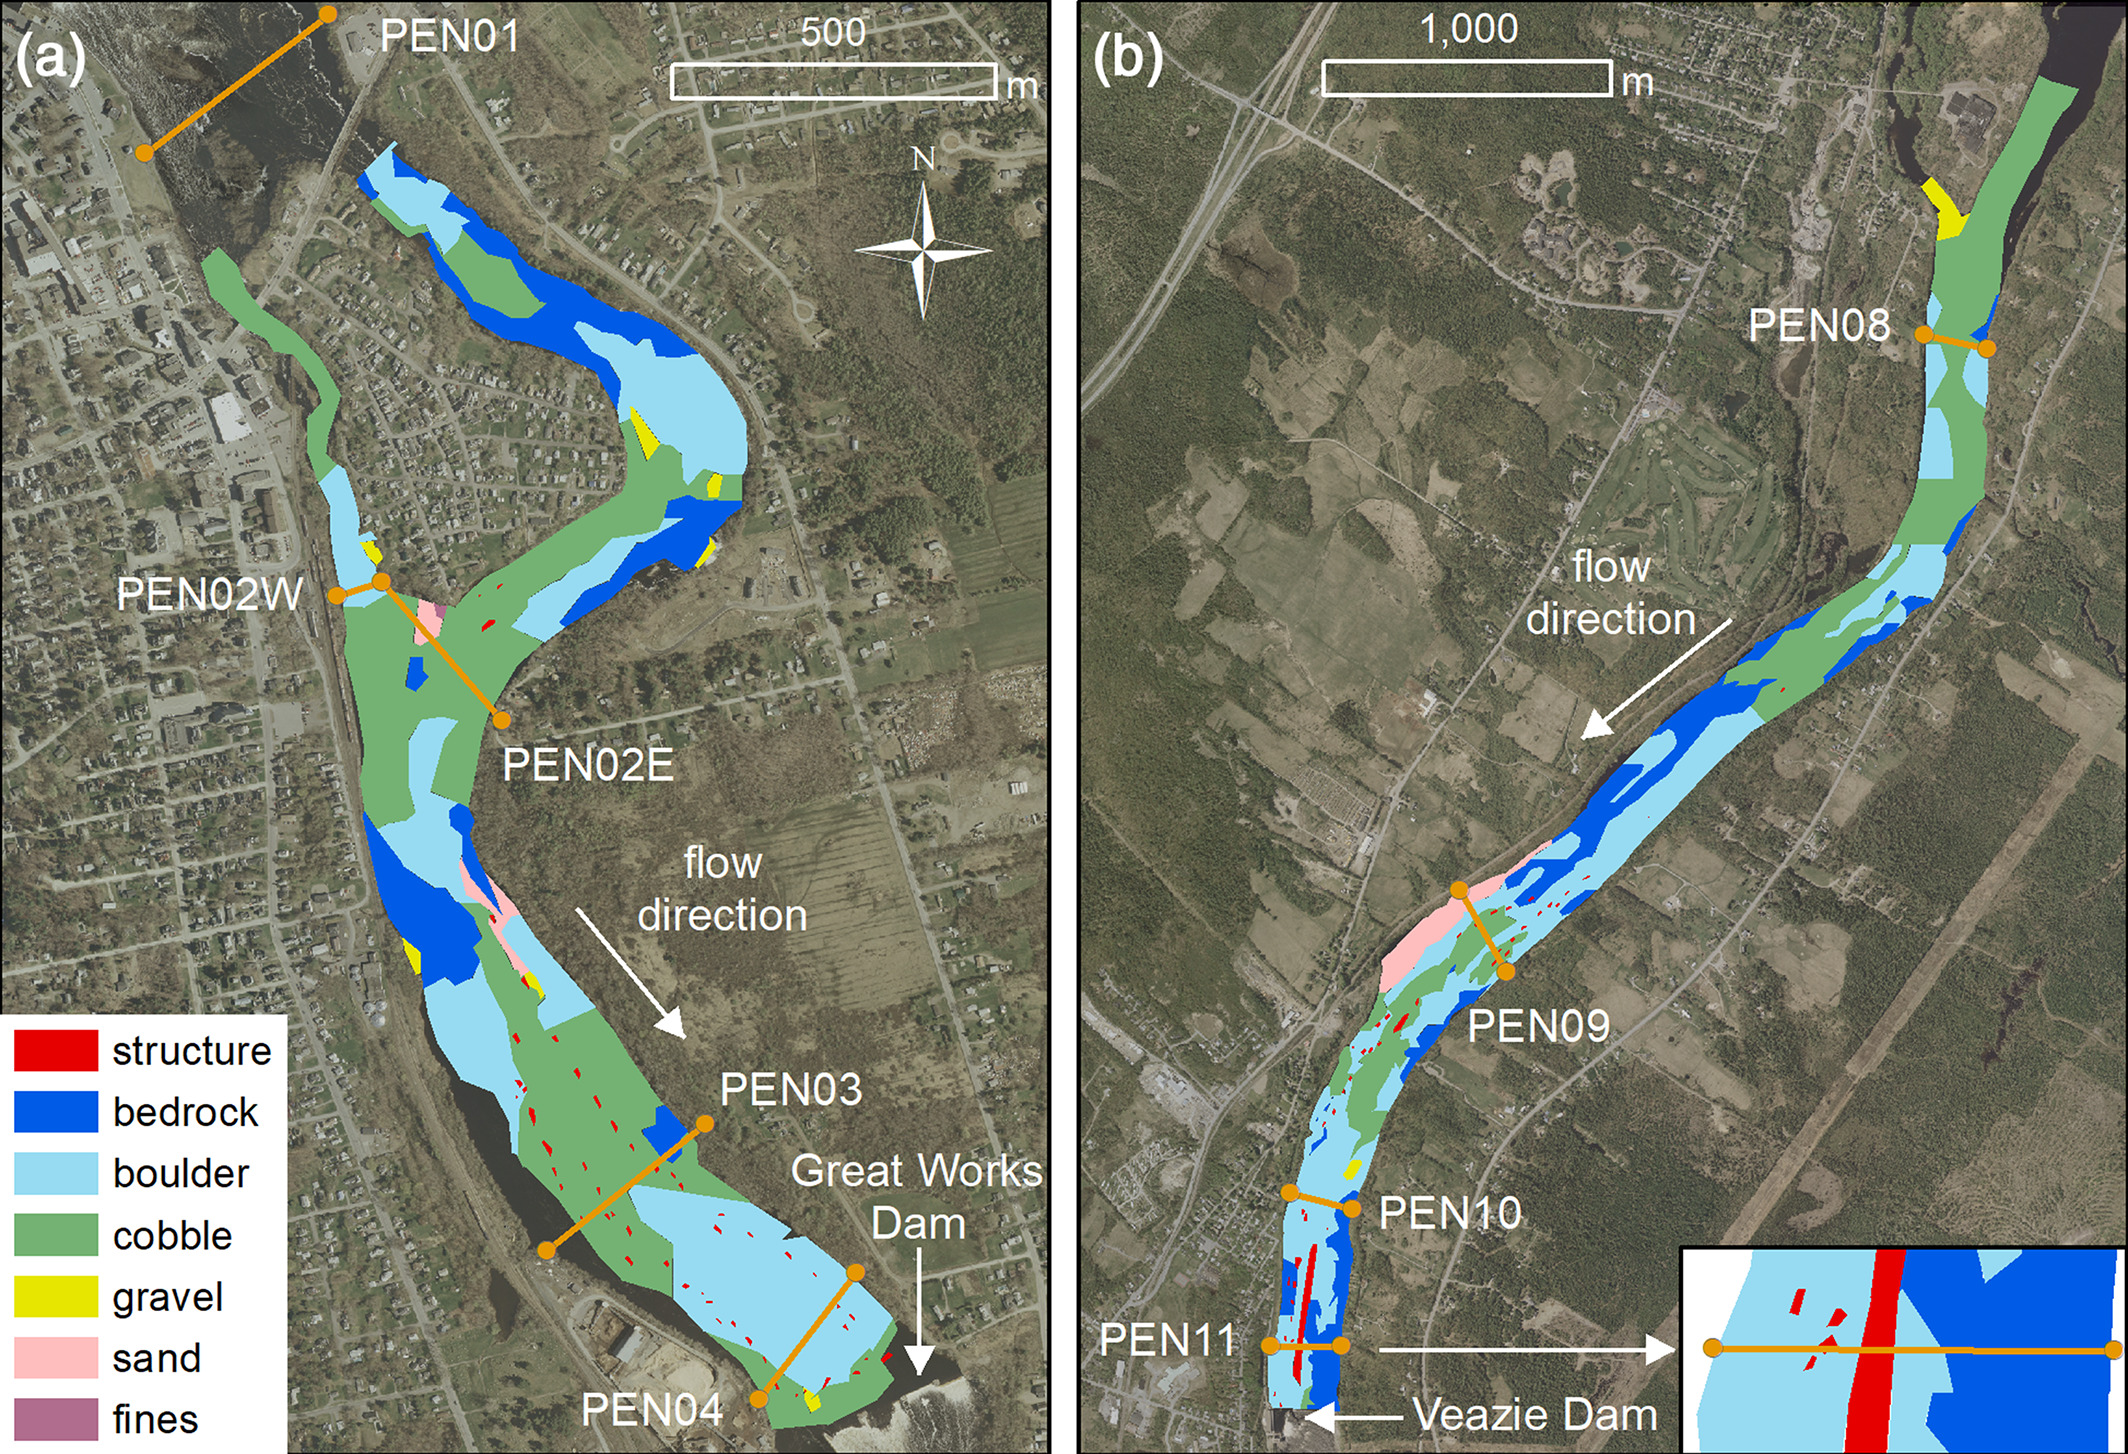

Secondly, these same processes explain why we see such a sudden shift in channel geometry after the dams are removed. As water height lowers, the relative velocity at the streambed is increased, making sediments that would have been in a dead zone suddenly recieve enough force to be transported. 

#  Part 1: Control Case

Import Libraies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

Retreive "PEN_All_Cond.csv". This is a set of data consolidated into one .csv file that is much easier to work with. I've also sent over the raw data which is spread over almost 300 files but I couldn't find an easy way to combine them in this runtime due to their varying lengths and naming scheme. The filesize also did not play well with google colab. (Special thanks to Joanmarie for extracting this from an R file). While it is best practice to manipulate this data directly in your coding environment, due to the varying number of datapoints across each observation and the output formating of our CSV files (x is used as a header in both axises), this dataset would not play well with standard methods of dataframe creation. 

Data Used in this Tutorial: [PEN_All_Cond.csv](https://drive.google.com/drive/folders/1pzpmYRCtC4I5Z7YUikTv_S6MReqvw147?usp=sharing)

Raw Dataset: [PEN_All](https://drive.google.com/drive/folders/1kB3CMITNnUPkqxu1e4gPMYYwIiBM79pD?usp=sharing)

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving PEN01_08_2013_wse_x.csv to PEN01_08_2013_wse_x.csv
Saving PEN01_08_2013_wse_z.csv to PEN01_08_2013_wse_z.csv
Saving PEN01_08_2013_x.csv to PEN01_08_2013_x.csv
Saving PEN01_08_2013_z.csv to PEN01_08_2013_z.csv
Saving PEN01_09_2015_wse_x.csv to PEN01_09_2015_wse_x.csv
Saving PEN01_09_2015_wse_z.csv to PEN01_09_2015_wse_z.csv
Saving PEN01_09_2015_x.csv to PEN01_09_2015_x.csv
Saving PEN01_09_2015_z.csv to PEN01_09_2015_z.csv
Saving PEN01_10_2014_wse_x.csv to PEN01_10_2014_wse_x.csv
Saving PEN01_10_2014_wse_z.csv to PEN01_10_2014_wse_z.csv
Saving PEN01_10_2014_x1.csv to PEN01_10_2014_x1.csv
Saving PEN01_10_2014_x2.csv to PEN01_10_2014_x2.csv
Saving PEN01_10_2014_x3.csv to PEN01_10_2014_x3.csv
Saving PEN01_10_2014_z1.csv to PEN01_10_2014_z1.csv
Saving PEN01_10_2014_z2.csv to PEN01_10_2014_z2.csv
Saving PEN01_10_2014_z3.csv to PEN01_10_2014_z3.csv
Saving PEN01_11_2009_wse_x.csv to PEN01_11_2009_wse_x.csv
Saving PEN01_11_2009_wse_z.csv to PEN01_11_2009_wse_z.csv
Saving PEN01_11_2009_x.c

Creating our dataframe and cleaning up our headers. (Note how many entries there are with only 3 sites selected. For context there are 10 other sites in this study)

In [ ]:
df = pd.read_csv("PEN_All_Cond.csv", encoding= 'unicode_escape')
df.rename(columns={'ï»¿Site':'Site'}, inplace=True)
df

,Site,Date,x,z,wse_x,wse_z
0,1,13-Aug,0.000000,33.290255,16.989551,25.085039
1,1,13-Aug,1.045464,32.516063,17.525999,25.085039
2,1,13-Aug,2.959608,31.693103,18.135599,25.085039
3,1,13-Aug,3.243072,32.031431,35.966399,25.085039
4,1,13-Aug,3.614928,31.159703,36.527231,25.085039
...,...,...,...,...,...,...
5660,11,Nov-09,247.778008,10.835640,NaN,NaN
5661,11,Nov-09,248.027944,10.890504,NaN,NaN
5662,11,Nov-09,248.207776,11.295888,NaN,NaN
5663,11,Nov-09,248.363224,11.378184,NaN,NaN


Just double checking that we actually have the sites we want to look at

In [ ]:
site_list = df.Site.unique()
site_list


array([ 1,  4, 11])

Now its time to extract one of our sites from the dataframe. For this example we will be using site 1 but feel free to change the site number and see how the graph changes

In [ ]:
df1 = df[(df.Site)==1] # Replace the number with the site number you wish to plot

Now it's time to plot! We will be plotting both the streambed geography and recorded water level for our selected survey site on one plot. Due to the inaccessability of some parts of the river based on flow velocity and depth, the data is not continuous at some points which leads to lines in our plot. 

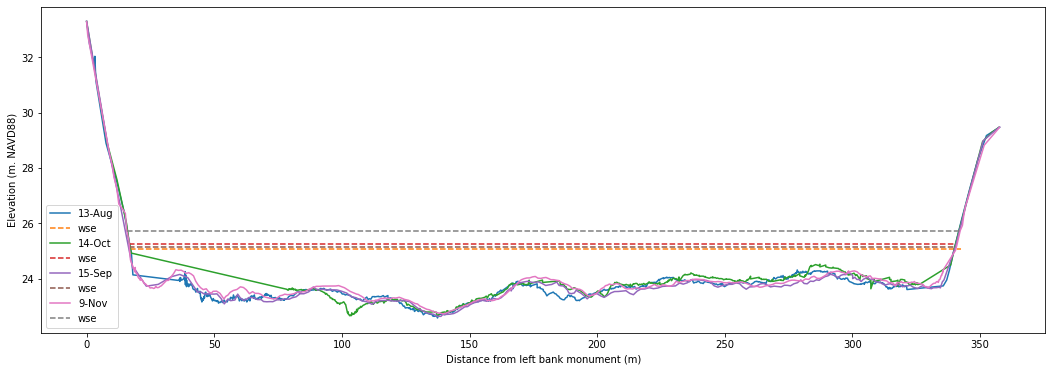

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))

for name, group in df1.groupby('Date'):
    group.plot(x='x', y='z', ax=ax, label=name)
    group.plot(x='wse_x', y='wse_z', ax=ax, label="wse", linestyle='dashed')

ax.set_xlabel('Distance from left bank monument (m)')
ax.set_ylabel('Elevation (m. NAVD88)')
plt.show()

# Discussion Questions



1.   What were the biggest impacts of dam removal and how might that effect the aquatic ecosystem? (As a reminder, both dams were removed in 2012/13)
2.   In a few sentances, explain the geomorphic processes that create the differences we see in our two dam removal sites (4 and 11). 

